## Solving the "banknote authentication" problem

0 iteration with fitness = 0.0243528746935419
1 iteration with fitness = 0.0243528746935419
2 iteration with fitness = 0.02036879998724354
3 iteration with fitness = 0.015545186150499228
4 iteration with fitness = 0.015545186150499228
5 iteration with fitness = 0.015545186150499228
6 iteration with fitness = 0.00894652418977849
7 iteration with fitness = 0.00894652418977849
8 iteration with fitness = 0.00894652418977849
9 iteration with fitness = 0.00894652418977849
10 iteration with fitness = 0.00894652418977849
11 iteration with fitness = 0.00894652418977849
12 iteration with fitness = 0.00894652418977849
13 iteration with fitness = 0.00894652418977849
confusion_matrix: 
 [[228   0]
 [  0 182]]
f1_score: 
 1.0


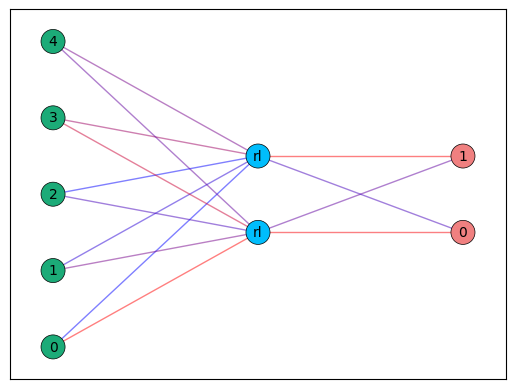

In [1]:
import numpy as np

from thefittest.optimizers import SelfCGP
from thefittest.optimizers import SHADE
from thefittest.benchmarks import BanknoteDataset
from thefittest.classifiers import GeneticProgrammingNeuralNetClassifier
from thefittest.tools.transformations import scale_data
from thefittest.tools.random import train_test_split_stratified
from thefittest.tools.metrics import confusion_matrix
from thefittest.tools.metrics import f1_score
from thefittest.tools.print import print_net


data = BanknoteDataset()
X = data.get_X()
y = data.get_y()

X_scaled = scale_data(X)

X_train, X_test, y_train, y_test = train_test_split_stratified(
    X_scaled, y, tests_size=0.3)

model = GeneticProgrammingNeuralNetClassifier(iters=15,
                                              pop_size=50,
                                              optimizer=SelfCGP,
                                              optimizer_args={"show_progress_each": 1},
                                              weights_optimizer=SHADE,
                                              weights_optimizer_args={"iters": 100, "pop_size": 100})

model.fit(X_train, y_train)

predict = model.predict(X_test)
net = model.get_optimizers()[0].get_fittest()["phenotype"]

print("confusion_matrix: \n", confusion_matrix(y_test, predict))
print("f1_score: \n", f1_score(y_test, predict))

print_net(net = net)

## modeling of the "sin" function

In [12]:
import matplotlib.pyplot as plt

from thefittest.regressors import GeneticProgrammingNeuralNetRegressor
from thefittest.tools.metrics import coefficient_determination
from thefittest.tools.random import train_test_split
from thefittest.optimizers import SHAGA
from thefittest.tools.transformations import scale_data


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)
X_scaled = scale_data(X)
y_scaled = scale_data(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 0.33)

model = GeneticProgrammingNeuralNetRegressor(iters=15,
                                             pop_size=50,
                                             optimizer=SelfCGP,
                                             optimizer_args={"show_progress_each": 1},
                                             weights_optimizer=SHADE,
                                             weights_optimizer_args={"iters": 100, "pop_size": 100})

model.fit(X_train, y_train)

predict = model.predict(X_test)[:,0]
net = model.get_optimizers()[0].get_fittest()["phenotype"]

print("coefficient_determination: \n", coefficient_determination(y_test, predict))

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X_scaled[:,0], y_scaled, label = "True y")
ax[0].scatter(X_test[:,0], predict, label = "Predict y")
ax[0].legend()

print_net(net = net, ax = ax[1]) 

plt.tight_layout()
plt.show()


[1.         0.82940176 0.27755477 0.1949414  0.15819098 0.0691708
 0.04721621 0.01567063 0.         0.03649622 0.07696195 0.10202664
 0.34119423 0.42029921 0.49922583 0.53779658 0.5753523  0.61159523
 0.67903736 0.85067125 0.86483366 0.86078387 0.84418777 0.78118148
 0.7139107  0.68887495 0.60935493 0.58220253 0.55513334 0.47673169
 0.38642159 0.33512573 0.31042236 0.29384279 0.33715604 0.36313969
 0.43702551 0.46678084 0.48110342 0.4948795  0.54230447 0.5786691
 0.58251974 0.58684597 0.58552951 0.56727048 0.519111   0.5087477
 0.50656837 0.5050954  0.50435286 0.5050954  0.51507131 0.519111
 0.53390629 0.55087156 0.56204646 0.56727048 0.58552951 0.58693328
 0.58684597 0.58523542 0.56751077 0.53179115 0.4948795  0.48110342
 0.45204176 0.42187935 0.37722397 0.36313969 0.34972945 0.31515226
 0.29220481 0.30110402 0.47673169 0.50217659 0.55513334 0.6629383
 0.68887495 0.7139107  0.73779982 0.76030136 0.84418777 0.8538608
 0.86078387 0.85067125 0.10202664 0.03649622 0.01038463 0.00315958
 0